## 1.Get data

In [1]:
import os
import shutil
import random
from pathlib import Path

In [2]:
# KaggleHub dataset download
import kagglehub
dataset_path = kagglehub.dataset_download("hafiznouman786/potato-plant-diseases-data")

# Convert to a Path object
dataset_path = Path(dataset_path)

# Verify the dataset structure
print(f"Dataset downloaded to: {dataset_path}")

# List contents to check extracted files
for root, dirs, files in os.walk(dataset_path):
    print(f"{root}: {len(files)} files")


100%|██████████| 75.7M/75.7M [00:01<00:00, 40.6MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2: 0 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage: 0 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage/PlantVillage: 0 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage/PlantVillage/Potato___healthy: 152 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage/PlantVillage/Potato___Early_blight: 1000 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage/PlantVillage/Potato___Late_blight: 1000 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PotatoPlants: 0 files
/root/.cache/kagglehub/datasets/hafi

In [3]:
# Define destination
destination_path = Path("/content/potato_disease")

# Move dataset to /content
if not destination_path.exists():
    shutil.move(str(dataset_path), str(destination_path))
    print(f"Dataset moved to {destination_path}")
else:
    print(f"Dataset already exists at {destination_path}")

# Verify
os.listdir(destination_path)

Dataset moved to /content/potato_disease


['PlantVillage', 'PotatoPlants']

### 1.1 Create Train(80%) and Test data(20%)

In [4]:
# Define original dataset path (modify if needed)
original_data_path = Path("/content/potato_disease/PlantVillage/PlantVillage")

# Define train/test split path
base_dir = Path("/content/data")
train_dir = base_dir / "train"
test_dir = base_dir / "test"

# Create train and test directories
for folder in [train_dir, test_dir]:
    folder.mkdir(parents=True, exist_ok=True)

# Loop through each class folder
for class_folder in os.listdir(original_data_path):
    class_path = original_data_path / class_folder  # Path to class images

    # Skip if it's not a directory
    if not class_path.is_dir():
        continue

    # Create train/test class folders
    (train_dir / class_folder).mkdir(parents=True, exist_ok=True)
    (test_dir / class_folder).mkdir(parents=True, exist_ok=True)

    # Get list of images and shuffle
    images = list(class_path.glob("*.JPG"))  # Adjust extension if needed
    random.shuffle(images)

    # Split 80% train, 20% test
    split_idx = int(len(images) * 0.8)
    train_images = images[:split_idx]
    test_images = images[split_idx:]

    # Move images
    for img in train_images:
        shutil.move(str(img), str(train_dir / class_folder / img.name))

    for img in test_images:
        shutil.move(str(img), str(test_dir / class_folder / img.name))

    print(f"Moved {len(train_images)} images to train/{class_folder} and {len(test_images)} to test/{class_folder}")

Moved 121 images to train/Potato___healthy and 31 to test/Potato___healthy
Moved 800 images to train/Potato___Early_blight and 200 to test/Potato___Early_blight
Moved 800 images to train/Potato___Late_blight and 200 to test/Potato___Late_blight


In [5]:
image_path = Path("/content/data")

## 2. Visualize image

Random image path: /content/data/train/Potato___Late_blight/0fe7786d-0e2f-4705-839d-898f1d9214b0___RS_LB 2836.JPG
Image class: Potato___Late_blight
Image height: 256
Image width: 256


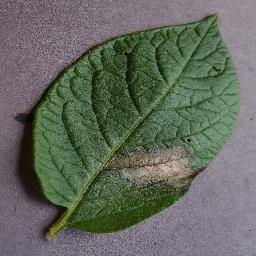

In [6]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.JPG"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

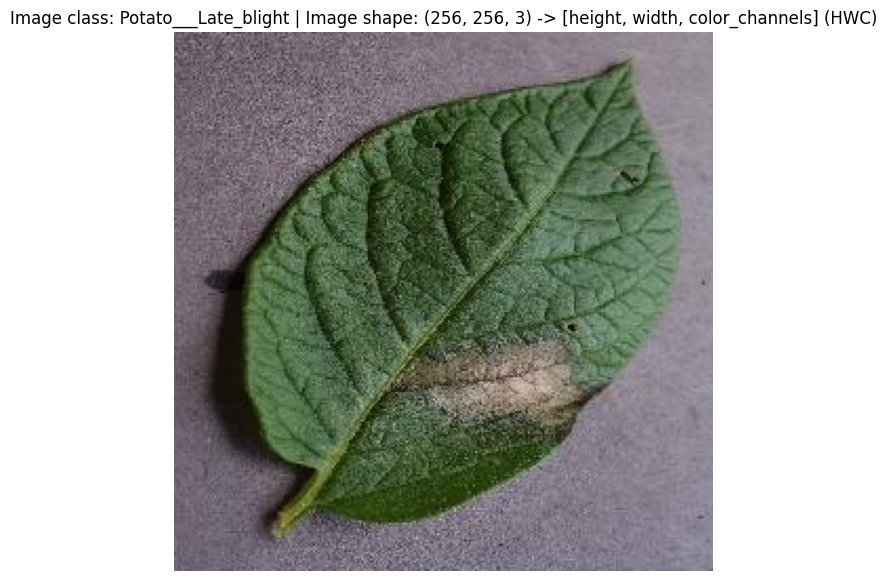

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(7, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);

array([[[117, 104, 113],
        [ 91,  78,  87],
        [114, 101, 110],
        ...,
        [155, 148, 156],
        [151, 144, 152],
        [148, 141, 149]],

       [[115, 102, 111],
        [111,  98, 107],
        [134, 121, 130],
        ...,
        [151, 144, 152],
        [149, 142, 150],
        [148, 141, 149]],

       [[110,  97, 106],
        [117, 104, 113],
        [121, 108, 117],
        ...,
        [148, 141, 149],
        [149, 142, 150],
        [149, 142, 150]],

       ...,

       [[111, 103, 118],
        [115, 107, 122],
        [ 92,  84,  99],
        ...,
        [130, 126, 141],
        [136, 132, 147],
        [141, 137, 152]],

       [[112, 104, 119],
        [108, 100, 115],
        [ 93,  85, 100],
        ...,
        [128, 124, 139],
        [132, 128, 143],
        [135, 131, 146]],

       [[116, 108, 123],
        [111, 103, 118],
        [109, 101, 116],
        ...,
        [124, 120, 135],
        [116, 112, 127],
        [111, 107, 122]]], dtype=uint8)
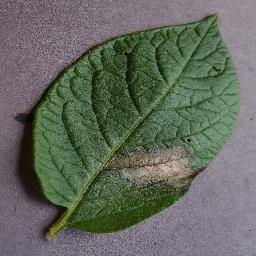

In [8]:
img_as_array

## 3. Transforming data

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
SIZE = 64

data_transform = transforms.Compose([
    transforms.Resize(size=(SIZE, SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [11]:
data_transform(img).shape

torch.Size([3, 64, 64])

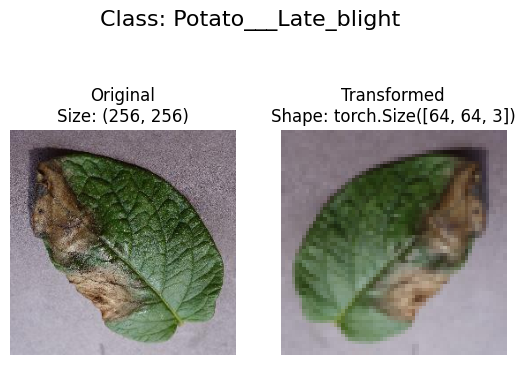

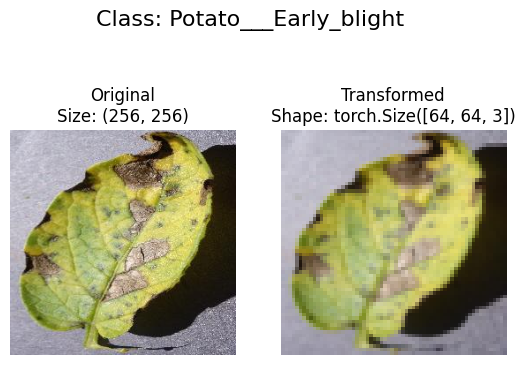

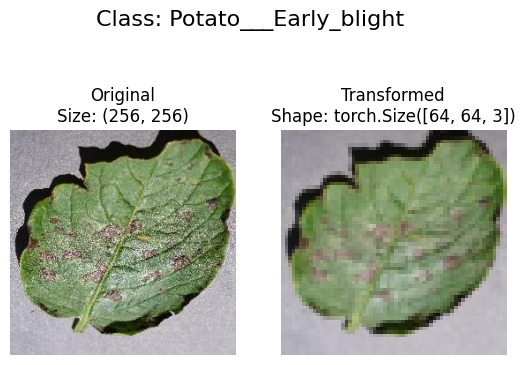

In [13]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # Change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

## 4. Loading Image

In [14]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1721
     Root location: /content/data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 431
     Root location: /content/data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
train_dir, test_dir

(PosixPath('/content/data/train'), PosixPath('/content/data/test'))

In [16]:
# Get class names as list
class_names = train_data.classes
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [18]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(1721, 431)

In [19]:
train_data.samples[0]

('/content/data/train/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG',
 0)

In [20]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.6941, 0.6902, 0.6863,  ..., 0.5608, 0.5647, 0.5765],
         [0.7059, 0.6902, 0.6941,  ..., 0.5569, 0.5647, 0.5725],
         [0.6863, 0.6941, 0.7020,  ..., 0.5490, 0.5686, 0.5490],
         ...,
         [0.6275, 0.6353, 0.6431,  ..., 0.5059, 0.4824, 0.5098],
         [0.6314, 0.6314, 0.6353,  ..., 0.5255, 0.5098, 0.5137],
         [0.6353, 0.6275, 0.6510,  ..., 0.4941, 0.4902, 0.4784]],

        [[0.6824, 0.6784, 0.6745,  ..., 0.5490, 0.5529, 0.5647],
         [0.6941, 0.6784, 0.6824,  ..., 0.5451, 0.5529, 0.5608],
         [0.6745, 0.6824, 0.6902,  ..., 0.5373, 0.5569, 0.5373],
         ...,
         [0.6235, 0.6275, 0.6275,  ..., 0.4902, 0.4667, 0.4941],
         [0.6235, 0.6196, 0.6235,  ..., 0.5098, 0.4941, 0.4980],
         [0.6275, 0.6196, 0.6353,  ..., 0.4784, 0.4745, 0.4627]],

        [[0.7098, 0.7059, 0.7020,  ..., 0.5765, 0.5804, 0.5922],
         [0.7216, 0.7059, 0.7098,  ..., 0.5725, 0.5804, 0.5882],
         [0.7020, 0.7098, 0.7176,  ..., 0.5

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'Potato___Early_blight')

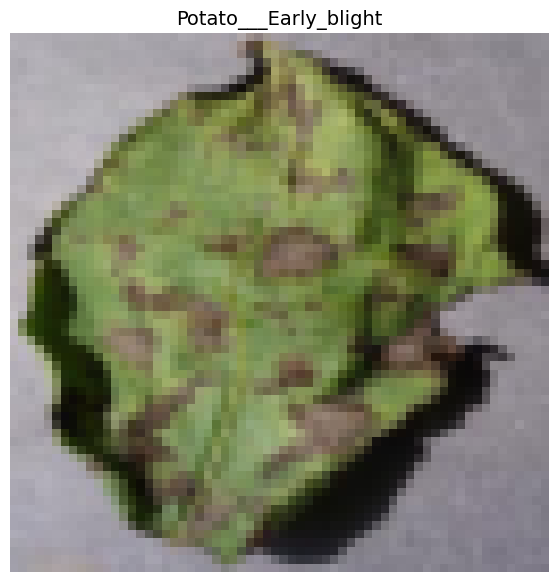

In [21]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into `DataLoader`'s

In [22]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cc40d695350>,
 <torch.utils.data.dataloader.DataLoader at 0x7cc40d6f5310>)

In [23]:
len(train_dataloader), len(test_dataloader)

(1721, 431)

In [24]:
from typing import List
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

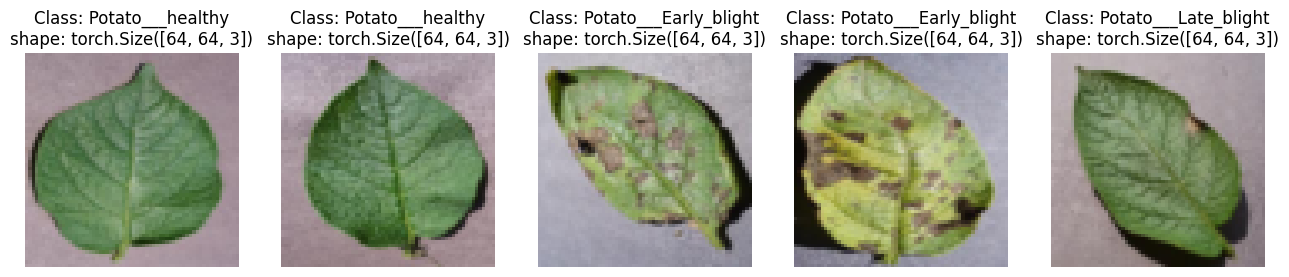

In [25]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

## 5. Create Model

In [26]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch import nn

In [30]:
SIZE = 64
BATCH_SIZE = 1

data_transform = transforms.Compose([transforms.Resize(size=(SIZE, SIZE)), transforms.RandomHorizontalFlip(p=0.5), transforms.ToTensor()])

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)


train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [31]:
class PotatoDiseaseModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.conv_block_2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2))

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [32]:
torch.manual_seed(42)
model = PotatoDiseaseModel(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names))

model

PotatoDiseaseModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [33]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [35]:
# Try a forward pass
model(image_batch)

tensor([[ 0.0194, -0.0028,  0.0088]], grad_fn=<AddmmBackward0>)

In [36]:
!pip install torchinfo


In [37]:
import torchinfo

from torchinfo import summary
summary(model, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
PotatoDiseaseModel                       [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [38]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [39]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [40]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

In [42]:
# Set random seeds
torch.manual_seed(42)

# Set number of epochs and LR
NUM_EPOCHS = 21
LR = 0.001

# Recreate an instance of TinyVGG
model = PotatoDiseaseModel(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=LR)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/21 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.7420 | Train acc: 0.6467 | Test loss: 0.4757 | Test acc: 0.8213
Epoch: 1 | Train loss: 0.4652 | Train acc: 0.8205 | Test loss: 0.4443 | Test acc: 0.8329
Epoch: 2 | Train loss: 0.4075 | Train acc: 0.8344 | Test loss: 0.3662 | Test acc: 0.8631
Epoch: 3 | Train loss: 0.3517 | Train acc: 0.8605 | Test loss: 0.3225 | Test acc: 0.8886
Epoch: 4 | Train loss: 0.3031 | Train acc: 0.8809 | Test loss: 0.3669 | Test acc: 0.8817
Epoch: 5 | Train loss: 0.2773 | Train acc: 0.8960 | Test loss: 0.2493 | Test acc: 0.9165
Epoch: 6 | Train loss: 0.2327 | Train acc: 0.9117 | Test loss: 0.2570 | Test acc: 0.9002
Epoch: 7 | Train loss: 0.2410 | Train acc: 0.9140 | Test loss: 0.3149 | Test acc: 0.8770
Epoch: 8 | Train loss: 0.2095 | Train acc: 0.9198 | Test loss: 0.2382 | Test acc: 0.9026
Epoch: 9 | Train loss: 0.1848 | Train acc: 0.9361 | Test loss: 0.2240 | Test acc: 0.9095
Epoch: 10 | Train loss: 0.1618 | Train acc: 0.9367 | Test loss: 0.1664 | Test acc: 0.9350
Epoch: 11 | Train lo

## 6. Make Prediction

In [43]:
def make_predictions(model: torch.nn.Module,
                     data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension)
      sample = torch.unsqueeze(sample, dim=0)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob)

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [44]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([3, 64, 64])

Text(0.5, 1.0, 'Potato___Late_blight')

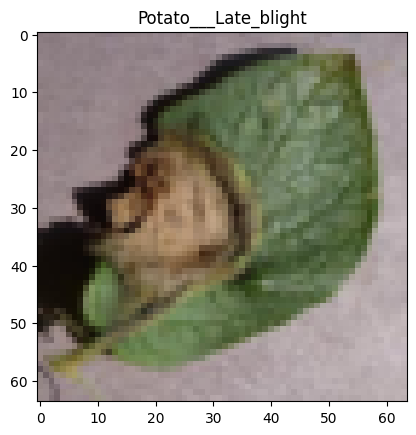

In [45]:
plt.imshow(test_samples[0].squeeze().permute(1, 2, 0))
plt.title(class_names[test_labels[0]])

In [46]:
# Make predictions
pred_probs = make_predictions(model=model,
                              data=test_samples)

# View prediction probabilities
pred_probs

tensor([[6.4539e-02, 9.3546e-01, 4.2385e-12],
        [9.9992e-01, 7.9254e-05, 4.4168e-16],
        [3.9093e-02, 9.6051e-01, 4.0044e-04],
        [2.2082e-03, 9.9779e-01, 2.1272e-08],
        [9.9962e-01, 3.8100e-04, 1.2122e-10],
        [1.0000e+00, 1.2166e-09, 4.5364e-21],
        [1.7472e-02, 9.8238e-01, 1.5176e-04],
        [1.1132e-06, 9.9980e-01, 1.9433e-04],
        [1.0000e+00, 1.0491e-07, 4.5111e-12]])

In [47]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 0, 1, 1, 0, 0, 1, 1, 0])

In [48]:
test_labels

[1, 0, 1, 1, 0, 0, 1, 1, 0]

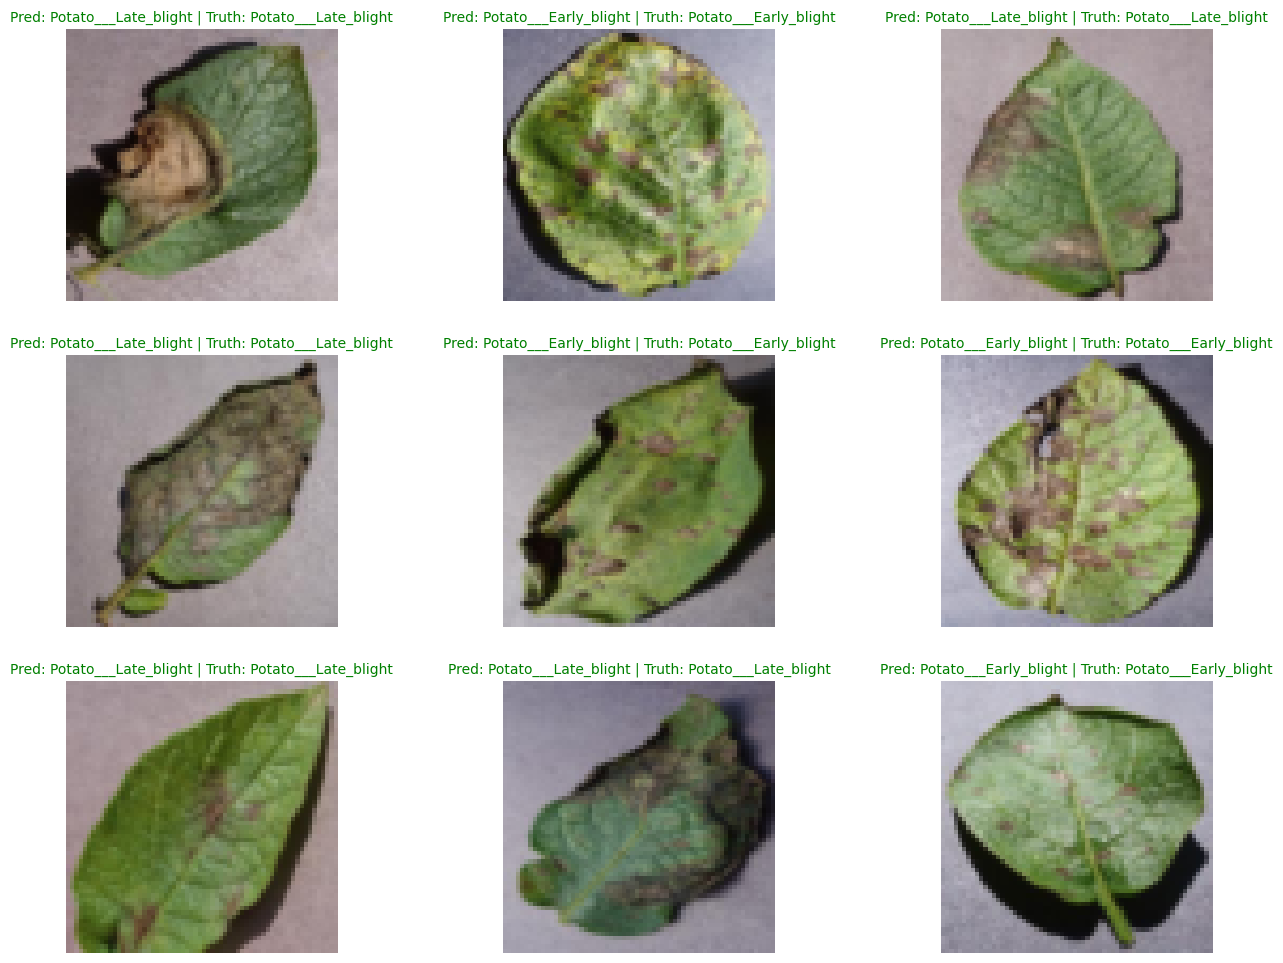

In [49]:
# Plot predictions
plt.figure(figsize=(16, 12))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze().permute(1, 2, 0))

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

## 7. Evaluate

In [50]:
!pip install torchmetrics -U mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 822.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [51]:
import torchmetrics, mlxtend

In [52]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):

    # Do the forward pass
    y_logit = model(X)

    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred)

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/431 [00:00<?, ?it/s]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

<ipython-input-54-983379eeea8d>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_tensor = torch.tensor(y_pred_tensor)


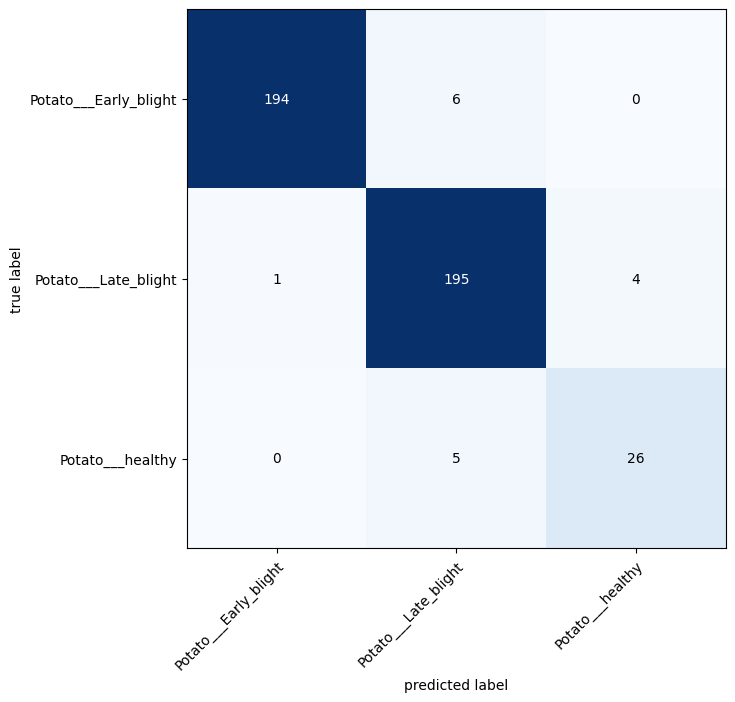

In [54]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",
                          num_classes=len(class_names))

y_pred_tensor = torch.tensor(y_pred_tensor)
y_true_tensor = torch.tensor(test_data.targets)

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

In [57]:
import pandas as pd
model_df = pd.DataFrame(model_results)
model_df

,train_loss,train_acc,test_loss,test_acc
0,0.741959,0.646717,0.475659,0.821346
1,0.465214,0.820453,0.444250,0.832947
2,0.407500,0.834399,0.366213,0.863109
3,0.351660,0.860546,0.322517,0.888631
4,0.303058,0.880883,0.366879,0.881671
5,0.277324,0.895991,0.249274,0.916473
6,0.232685,0.911679,0.256998,0.900232
7,0.241016,0.914003,0.314925,0.877030
8,0.209475,0.919814,0.238242,0.902552
9,0.184837,0.936084,0.224036,0.909513


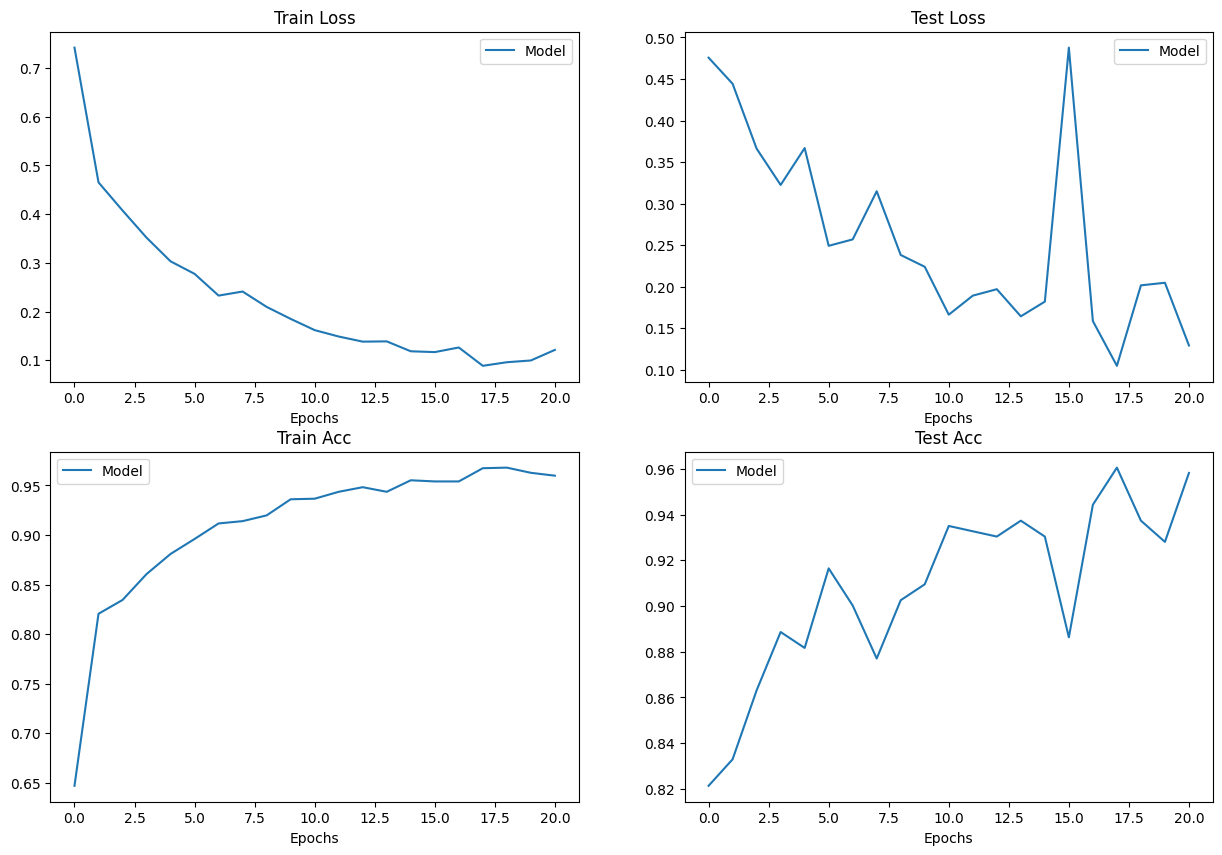

In [59]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_df["train_loss"], label="Model")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_df["test_loss"], label="Model")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_df["train_acc"], label="Model")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_df["test_acc"], label="Model")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend();

## 8. Predict Custom Image

In [122]:
custom_image_path = Path("/content/EarlyBlight_1.JPG")

In [123]:
custom_image_path

PosixPath('/content/EarlyBlight_1.JPG')

In [124]:
import torchvision

In [125]:
# # Load in the custom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.6275, 0.6353, 0.7020,  ..., 0.6863, 0.7216, 0.8039],
         [0.6157, 0.6157, 0.6863,  ..., 0.6314, 0.6157, 0.6863],
         [0.6667, 0.6627, 0.6510,  ..., 0.8039, 0.7490, 0.7765],
         ...,
         [0.5490, 0.5647, 0.6000,  ..., 0.5412, 0.5333, 0.4980],
         [0.5490, 0.5882, 0.6039,  ..., 0.4588, 0.5686, 0.6784],
         [0.5412, 0.5686, 0.5373,  ..., 0.6353, 0.5725, 0.5490]],

        [[0.6118, 0.6196, 0.6863,  ..., 0.6745, 0.7098, 0.7922],
         [0.6000, 0.6000, 0.6706,  ..., 0.6196, 0.6039, 0.6745],
         [0.6510, 0.6471, 0.6353,  ..., 0.7922, 0.7373, 0.7647],
         ...,
         [0.5255, 0.5412, 0.5765,  ..., 0.5255, 0.5176, 0.4824],
         [0.5255, 0.5647, 0.5804,  ..., 0.4431, 0.5529, 0.6627],
         [0.5176, 0.5451, 0.5137,  ..., 0.6196, 0.5569, 0.5333]],

        [[0.6706, 0.6784, 0.7451,  ..., 0.7176, 0.7529, 0.8353],
         [0.6588, 0.6588, 0.7294,  ..., 0.6627, 0.6471, 0.7176],
         [0.7098, 0.7059, 0.6941,  ..., 0.8353, 0.7804, 0.

In [126]:
# Create transform pipeline to resize image
from torchvision import transforms
custom_image_transform = transforms.Compose([
                                             transforms.Resize(size=(64, 64))
])

# Transfrom target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 256, 256])
Transformed shape: torch.Size([3, 64, 64])


In [127]:
# plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [128]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None):
  """Makes a prediction on a target image with a trained model and plots the image and prediction."""
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image) # make sure the target image is on the right device

  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert predction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to be HWC
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max():.3f}"
  plt.title(title)
  plt.axis(False)

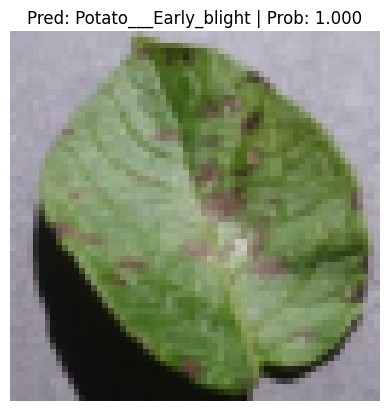

In [129]:
# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

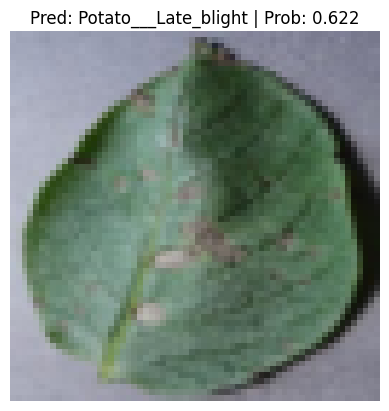

In [131]:
custom_image_path = Path("/content/EarlyBlight_2.JPG")

# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

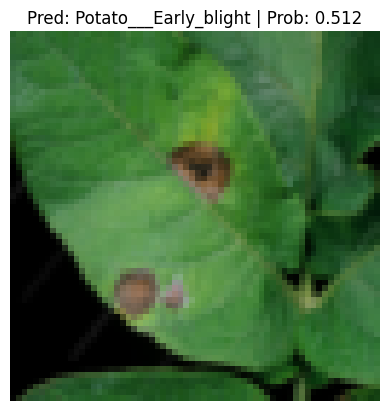

In [132]:
custom_image_path = Path("/content/EarlyBlight_3.jpg")

# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

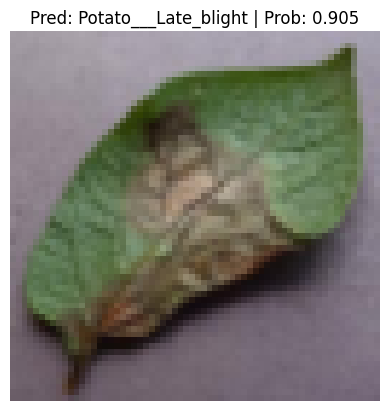

In [133]:
custom_image_path = Path("/content/LateBlight_1.JPG")

# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

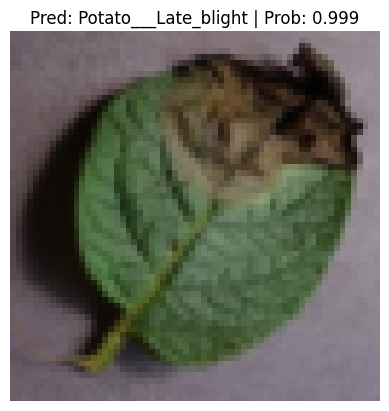

In [134]:
custom_image_path = Path("/content/LateBlight_2.JPG")

# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

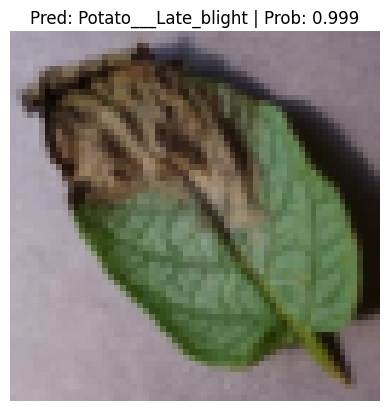

In [135]:
custom_image_path = Path("/content/LateBlight_3.JPG")

# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

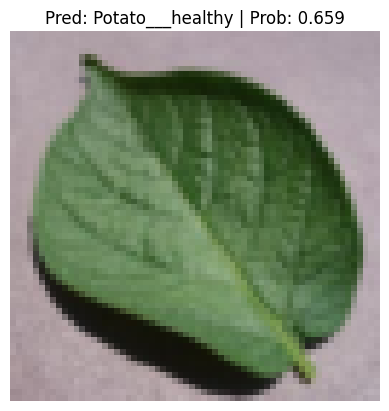

In [136]:
custom_image_path = Path("/content/Normal_1.JPG")

# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

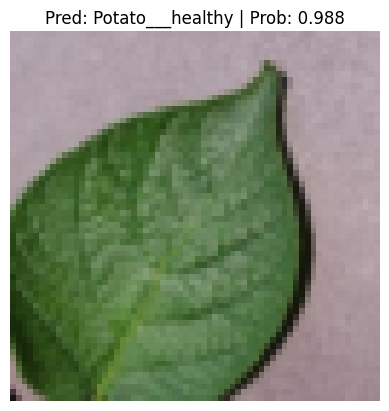

In [137]:
custom_image_path = Path("/content/Normal_2.JPG")

# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

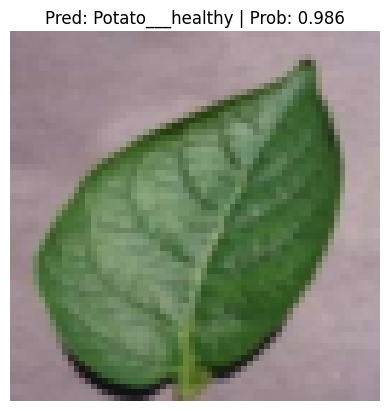

In [138]:
custom_image_path = Path("/content/Normal_3.png")

# Pred on our custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform)

## 9. save Model

In [139]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "PotatoDiseaseModel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/PotatoDiseaseModel.pth
